In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_file, show, output_notebook
from bokeh.models import Span
from shapely.geometry import Point
import geopandas as gpd
import glob
from datetime import datetime
from bokeh.layouts import Row, column, gridplot
from bokeh.models import Title, Legend, TapTool, Range1d
import matplotlib as mpl
output_notebook()

c:\Users\sahit\anaconda3\envs\datapartnership\lib\site-packages\geopandas\_compat.py:111: UserWarning: The Shapely GEOS version (3.10.1-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


Loading BokehJS ...

In [2]:
mpl.rcParams['font.family'] = 'Helvetica'
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['font.size'] = 12

In [3]:
def convert_to_gdf(df):
    geometry = [Point(xy) for xy in zip(df.longitude, df.latitude)]
    gdf = gpd.GeoDataFrame(df, crs="EPSG:4326", geometry=geometry)

    return gdf

# Analysing business activity trends in Turkiye

In [4]:
turkey_adm2 = gpd.read_file('../data/turkey_administrativelevels0_1_2/tur_polbna_adm2.shp')
turkey_adm1 = gpd.read_file('../data/turkey_administrativelevels0_1_2/tur_polbnda_adm1.shp')

## Observing Business Activity Trends 2022

In [5]:
all_files = glob.glob('../data/business_activity_trend/raw/2022_February/*.csv')

businessActivity2022 = pd.DataFrame(columns = ['polygon_id', 'polygon_name', 'polygon_level', 'polygon_version',
       'country', 'business_vertical', 'activity_quantile', 'latitude',
       'longitude', 'ds'])

li = []

for file in all_files:
    df1 = pd.read_csv(file)
    li.append(df1)

businessActivity2022 = pd.concat(li, axis=0)

In [6]:
# convert columns to datetime
businessActivity2022['ds'] = businessActivity2022['ds'].apply(lambda x: pd.to_datetime(x))
businessActivity2022 = businessActivity2022[businessActivity2022['country']=='TR' ]

In [7]:
business_verticals = list(businessActivity2022['business_vertical'].unique())
print(f'COVID-19 Business Actvity Trends has the following business verticals {business_verticals}')

COVID-19 Business Actvity Trends has the following business verticals ['Business & Utility Services', 'Travel', 'Local Events', 'Lifestyle Services', 'Public Good', 'Manufacturing', 'Grocery & Convenience Stores', 'Professional Services', 'Home Services', 'Retail', 'All', 'Restaurants']


In [8]:
color_palette = [  '#4E79A7',  # Blue
    '#F28E2B',  # Orange
    '#E15759',  # Red
    '#76B7B2',  # Teal
    '#59A14F',  # Green
    '#EDC948',  # Yellow
    '#B07AA1',  # Purple
    '#FF9DA7',  # Pink
    '#9C755F',  # Brown
    '#BAB0AC',  # Gray
    '#7C7C7C',  # Dark gray
    '#6B4C9A',  # Violet
    '#D55E00',  # Orange-red
    '#CC61B0',  # Magenta
    '#0072B2',  # Bright blue
    '#329262',  # Peacock green
    '#9E5B5A',  # Brick red
    '#636363',  # Medium gray
    '#CD9C00',  # Gold
    '#5D69B1',  # Medium blue
]

In [9]:
df=businessActivity2022[businessActivity2022['business_vertical']=='All'][['ds', 'activity_percentage']].reset_index()
title = "Business Activity for all verticals"

p1 = figure(x_axis_type = 'datetime', width = 500, height = 400, toolbar_location='above')

p1.line(df['ds'], df['activity_percentage'], line_width=4, line_color = '#4E79A7')

title = "Business Activity per Business Vertical"#"Business Activity Trends per Business Vertical in February 2022 (Compared to Pre-COVID Baseline)"

p2 = figure(title = title, x_axis_type = 'datetime', width = 800, height = 400, toolbar_location='above')
p2.add_layout(Legend(), "right")

for id, business_vertical in enumerate(business_verticals):
    df = businessActivity2022[businessActivity2022['business_vertical']==business_vertical][['ds', 'activity_percentage']].reset_index()
    p2.line(df['ds'], df['activity_percentage'], line_width=2, line_color = color_palette[id], legend_label=business_vertical)

p1.yaxis.axis_label = "Activity Percentage"
p1.y_range = Range1d(80, 150)
p1.yaxis.minor_tick_line_color = None
p2.yaxis.minor_tick_line_color = None
p2.y_range = Range1d(80, 150)
p2.legend.click_policy='hide'

p1.add_layout(Title(text="All Business Verticals"), 'above')

title_fig = figure(title='Business Activity Trends February 2022 (Compared to Pre-COVID Baseline)', toolbar_location=None,width=1000, height=50, )
title_fig.title.align = "left"
title_fig.title.text_font_size = "20pt"
title_fig.border_fill_alpha = 0
title_fig.outline_line_width=0
tap = TapTool(behavior="inspect")
p2.add_tools(tap)

sub_title = figure(title='Source: Data for Good at Meta', toolbar_location=None,width=1000, height=50, )
sub_title.title.align = "left"
sub_title.title.text_font_size = "10pt"
sub_title.title.text_font_style="normal"
sub_title.border_fill_alpha = 0
sub_title.outline_line_width=0


row = Row(children=[p1, p2])
grid = gridplot([[row]])
layout = column(title_fig, grid, sub_title)

show(layout)
# row.title.text("Business Activity Trends February 2022 (Compared to Pre-COVID Baseline)")


## Observing Business Activity Trends 2023

In [10]:
all_files = glob.glob('../data/business_activity_trend/raw/*.csv')

businessActivity2023 = pd.DataFrame(columns = ['polygon_id', 'polygon_name', 'polygon_level', 'polygon_version',
       'country', 'business_vertical', 'activity_quantile', 'latitude',
       'longitude', 'ds'])

li = []

for file in all_files:
    df1 = pd.read_csv(file)
    li.append(df1)

businessActivity2023 = pd.concat(li, axis=0)

In [11]:
# convert columns to datetime
businessActivity2023['ds'] = businessActivity2023['ds'].apply(lambda x: pd.to_datetime(x))
businessActivity2023 = businessActivity2023[businessActivity2023['country']=='TR' ]

In [12]:
gdf = convert_to_gdf(businessActivity2023)#.sjoin(turkey_adm2)
gdf = turkey_adm2.sjoin(gdf)

In [13]:
print(f'Business Activity Trends has {len(businessActivity2023["polygon_name"].unique())} districts and the boundaries map from UNOCHA contains {len(turkey_adm2["adm2_en"].unique())} districts. {len(turkey_adm2["adm2_en"].unique())-len(businessActivity2023["polygon_name"].unique())} districts do not have data')

Business Activity Trends has 575 districts and the boundaries map from UNOCHA contains 948 districts. 373 districts do not have data


In [14]:
# Convert polygon name to upper to match with boundaries file and change column name
import unicodedata

#df_ba['polygon_name'].fillna('NA', inplace = True)
businessActivity2023['polygon_name'] = businessActivity2023['polygon_name'].apply(lambda x: x.upper())
#df_ba.rename(columns = {'polygon_name':'adm2_en'}, inplace = True)
businessActivity2023['polygon_name'] = businessActivity2023['polygon_name'].apply(lambda x: unicodedata.normalize('NFD', x).encode('ascii', 'ignore').decode('utf-8'))

# Fixing the business activity trends admin names to match UNOCHA
businessActivity2023['polygon_name'].replace({'EYUP':'EYUPSULTAN', 'ONDOKUZ MAYIS':'19 MAYIS','KAZAN':'KAHRAMANKAZAN',
                          'DOGUBEYAZIT': 'DOGUBAYAZIT', 'MUSTAFA KEMALPASA':'MUSTAFAKEMALPASA', 'SULTAN KOCHISAR':'SEREFLIKOCHISAR',
                            'SINCANLI':'SINANPASA', 'AKKOY':'PAMUKKALE', 'SULTAN KARAHISAR':'SEBINKARAHISAR' }, inplace = True)

matched_districts = list(set(businessActivity2023['polygon_name'].unique()).intersection(set(turkey_adm2['adm2_en'].unique())))
print(list(businessActivity2023[~(businessActivity2023["polygon_name"].isin(matched_districts))]['polygon_name'].unique()))
print('The above districts remain unmapped. Note: Merkez district unmapped is due to a bug in the GADM data. To account for this, we used the lat long coordinates and joined with the shapefiles being used in this project from UNOCHA')

['MERKEZ']
The above districts remain unmapped. Note: Merkez district unmapped is due to a bug in the GADM data. To account for this, we used the lat long coordinates and joined with the shapefiles being used in this project from UNOCHA


findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


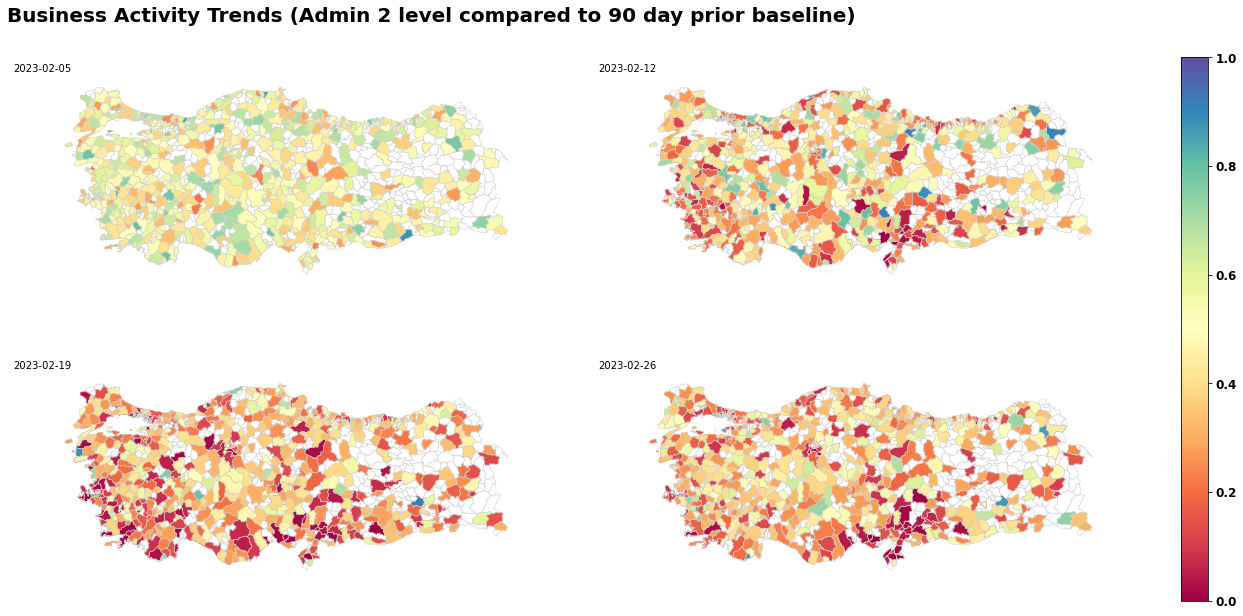

In [15]:
fig, axs = plt.subplots(2,2,figsize = (24,10), sharex=True, sharey=True)
ax = axs.flatten()


dates_of_interest = ['2023-02-05', '2023-02-12', '2023-02-19', '2023-02-26']
images = []

for i in range(0, len(dates_of_interest)):
    turkey_adm2.boundary.plot(ax=ax[i], edgecolor = '#D3D3D3', linewidth=0.5)
    im=gdf[gdf['ds']==dates_of_interest[i]][['activity_quantile', 'geometry']].plot(column = 'activity_quantile', ax=ax[i], legend = False, cmap = 'Spectral', vmin=0, vmax =1)
    images.append(im.collections[0])
    ax[i].set_title(f'{dates_of_interest[i]}', fontsize = 10, )
    ax[i].title.set_position([0,0])

    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['left'].set_visible(False)

cbar = fig.colorbar(images[1], ax=axs)
suptitle= fig.suptitle('Business Activity Trends (Admin 2 level compared to 90 day prior baseline)', fontsize = 20, fontweight = 'bold')
suptitle.set_y(0.95)
suptitle.set_x(0.35)
#ax[0].cax = cbar.ax[0]

for im in images:
    im.set_clim(vmin=0, vmax=1)
    im.set_cmap('Spectral')
    im.set_norm(cbar.norm)

In [16]:
df=businessActivity2023[businessActivity2023['business_vertical']=='All'][['ds', 'activity_quantile']].reset_index(drop=True)
df = df.groupby(['ds']).mean().reset_index()

title = "Business Activity for all verticals"

p1 = figure(x_axis_type = 'datetime', width = 500, height = 400, toolbar_location='above')

p1.line(df['ds'], df['activity_quantile'], line_width=4, line_color = '#4E79A7')

p1.renderers.extend([
        Span(
            location=datetime(2023, 2, 6),
            dimension="height",
            line_color='#7C7C7C',
            line_width=1,
            line_dash=(4,4)
      ),
        Span(
            location=datetime(2023, 2, 20),
            dimension="height",
            line_color='#7C7C7C',
            line_width=1,
            line_dash=(4,4)
        ),
    ]
)

title = "Business Activity per Business Vertical"#"Business Activity Trends per Business Vertical in February 2022 (Compared to Pre-COVID Baseline)"

p2 = figure(title = title, x_axis_type = 'datetime', width = 800, height = 400, toolbar_location='above')
p2.add_layout(Legend(), "right")

for id, business_vertical in enumerate(business_verticals):
    df = businessActivity2023[businessActivity2023['business_vertical']==business_vertical][['ds', 'activity_quantile']].reset_index()
    df = df.groupby(['ds']).mean().reset_index()
    p2.line(df['ds'], df['activity_quantile'], line_width=2, line_color = color_palette[id], legend_label=business_vertical)

p2.renderers.extend([
        Span(
            location=datetime(2023, 2, 6),
            dimension="height",
            line_color='#7C7C7C',
            line_width=1,
            line_dash=(4,4)
      ),
        Span(
            location=datetime(2023, 2, 20),
            dimension="height",
            line_color='#7C7C7C',
            line_width=1,
            line_dash=(4,4)
        ),
    ]
)

p1.yaxis.axis_label = "Activity Quantile"
p1.y_range = Range1d(0, 0.8)
p1.yaxis.minor_tick_line_color = None
p2.yaxis.minor_tick_line_color = None
p2.y_range = Range1d(0, 0.8)
p2.legend.click_policy='hide'

p1.add_layout(Title(text="All Business Verticals"), 'above')

title_fig = figure(title='Business Activity Trends February 2023 (National averages compared to 90 day prior baseline)', toolbar_location=None,width=1200, height=50, )
title_fig.title.align = "left"
title_fig.title.text_font_size = "20pt"
title_fig.border_fill_alpha = 0
title_fig.outline_line_width=0
tap = TapTool(behavior="inspect")
p2.add_tools(tap)

sub_title = figure(title='Source: Data for Good at Meta', toolbar_location=None,width=1000, height=50, )
sub_title.title.align = "left"
sub_title.title.text_font_size = "10pt"
sub_title.title.text_font_style="normal"
sub_title.border_fill_alpha = 0
sub_title.outline_line_width=0


row = Row(children=[p1, p2])
grid = gridplot([[row]])
layout = column(title_fig, grid, sub_title)

show(layout)
# row.title.text("Business Activity Trends February 2022 (Compared to Pre-COVID Baseline)")


## Change in Business Activity by business vertical in affected areas

In [17]:
aoi = gpd.read_file('../data/SYRTUR_tessellation.geojson')
aoi = gdf[gdf['pcode'].isin(aoi['ADM2_PCODE'].unique())]

In [18]:
nr_adm = len(aoi['pcode'].unique())
affected_adm2 = list(aoi['pcode'].unique())
print(f'There are {nr_adm} admin-2 regions which are of interest')

There are 75 admin-2 regions which are of interest


In [19]:
gdf['business_vertical'].fillna('Unknown', inplace = True)

In [20]:
business_verticals = ['Public Good', 'Retail', 'Grocery & Convenience Stores',
       'Professional Services', 'Restaurants', 'Manufacturing',
       'Business & Utility Services', 'Lifestyle Services', 'Home Services', 'Travel', 'Local Events']

### Calculating weekly averages of Business Activity

In [21]:
#convert date column to datetime and subtract one week
gdf['date'] = pd.to_datetime(gdf['ds']) - pd.to_timedelta(7, unit='d')

#calculate sum of values, grouped by week
week = gdf.groupby([pd.Grouper(key='date', freq='W-MON'), 'adm2_en', 'adm1_en', 'adm1', 'pcode', 'business_vertical']).mean().reset_index()

In [22]:
week = week[['date', 'adm2_en', 'adm1_en', 'adm1', 'pcode','business_vertical', 'activity_quantile']]

In [26]:
most_affected_adm2 = ['ANTAKYA', 'SAHINBEY', 'REYHANLI', 'KIRIKHAN']

In [27]:
images = []
renderers = []

for idx, adm2 in enumerate(most_affected_adm2):
    df = gdf[gdf['adm2_en']==adm2]
    title =adm2.capitalize()
    p1 = figure(title=title,x_axis_type = 'datetime', width = 500, height = 400, toolbar_location='above')
    for id, business_vertical in enumerate(business_verticals):
        df1 = df[df['business_vertical']==business_vertical][['ds', 'activity_quantile']].reset_index(drop=True).sort_values(by='ds')
        #p1.line(df1['ds'], df1['activity_quantile'], line_width=4, line_color = '#4E79A7')
        if idx==0:
            p1.line(df1['ds'], df1['activity_quantile'], line_width=2, line_color = color_palette[id], legend_label=business_vertical)
        else:
            p1.line(df1['ds'], df1['activity_quantile'], line_width=2, line_color = color_palette[id])
        
        
    
    p1.renderers.extend([
            Span(
                location=datetime(2023, 2, 6),
                dimension="height",
                line_color='#7C7C7C',
                line_width=1,
                line_dash=(4,4)
        ),
            Span(
                location=datetime(2023, 2, 20),
                dimension="height",
                line_color='#7C7C7C',
                line_width=1,
                line_dash=(4,4)
            ),
        ]
    )

    p1.yaxis.axis_label = "Activity Quantile"
    p1.y_range = Range1d(0, 0.8)
    p1.yaxis.minor_tick_line_color = None
    images.append(p1)
    #p1.legend.click_policy = "hide"


title_fig = figure(title='Business Activity Trends per business vertical in most affected areas (compared to 90 day prior baseline)', toolbar_location=None,width=1200, height=50, )
title_fig.title.align = "left"
title_fig.title.text_font_size = "18pt"
title_fig.border_fill_alpha = 0
title_fig.outline_line_width=0
tap = TapTool(behavior="inspect")
p2.add_tools(tap)

sub_title = figure(title='Source: Data for Good at Meta', toolbar_location=None,width=1000, height=50, )
sub_title.title.align = "left"
sub_title.title.text_font_size = "10pt"
sub_title.title.text_font_style="normal"
sub_title.border_fill_alpha = 0
sub_title.outline_line_width=0


row1 = Row(children=[images[0], images[1]])
row2 = Row(children=[images[2], images[3]])
grid = gridplot(images, ncols=2)
layout = column(title_fig, grid, sub_title)

show(layout)
# row.title.text("Business Activity Trends February 2022 (Compared to Pre-COVID Baseline)")


In [28]:
images = []
renderers = []

for idx,adm2 in enumerate(most_affected_adm2):
    df = week[week['adm2_en']==adm2]
    title =adm2.capitalize()
    p1 = figure(title=title, x_axis_type = 'datetime', width = 500, height = 400, toolbar_location='above')
    for id, business_vertical in enumerate(business_verticals):
        df1 = df[df['business_vertical']==business_vertical][['date', 'activity_quantile']].reset_index(drop=True).sort_values(by='date')
        #p1.line(df1['ds'], df1['activity_quantile'], line_width=4, line_color = '#4E79A7')
        if idx==0:
            p1.line(df1['date'], df1['activity_quantile'], line_width=2, line_color = color_palette[id], legend_label=business_vertical)
        else:
            p1.line(df1['date'], df1['activity_quantile'], line_width=2, line_color = color_palette[id])
        
        #p1.line(df1['date'], df1['activity_quantile'], line_width=2, line_color = color_palette[id], legend_label=business_vertical)
    
    p1.renderers.extend([
            Span(
                location=datetime(2023, 2, 6),
                dimension="height",
                line_color='#7C7C7C',
                line_width=1,
                line_dash=(4,4)
        ),
            Span(
                location=datetime(2023, 2, 20),
                dimension="height",
                line_color='#7C7C7C',
                line_width=1,
                line_dash=(4,4)
            ),
        ]
    )

    p1.yaxis.axis_label = "Activity Quantile"
    p1.y_range = Range1d(0, 0.8)
    p1.yaxis.minor_tick_line_color = None
    images.append(p1)
    #p1.legend.click_policy = "hide"


title_fig = figure(title='Business Activity Trends per business vertical in most affected areas (Weekly average compared to 90 day prior baseline)', toolbar_location=None,width=1200, height=50, )
title_fig.title.align = "left"
title_fig.title.text_font_size = "18pt"
title_fig.border_fill_alpha = 0
title_fig.outline_line_width=0
tap = TapTool(behavior="inspect")
p2.add_tools(tap)

sub_title = figure(title='Source: Data for Good at Meta', toolbar_location=None,width=1000, height=50, )
sub_title.title.align = "left"
sub_title.title.text_font_size = "10pt"
sub_title.title.text_font_style="normal"
sub_title.border_fill_alpha = 0
sub_title.outline_line_width=0


row1 = Row(children=[images[0], images[1]])
row2 = Row(children=[images[2], images[3]])
grid = gridplot(images, ncols=2)
layout = column(title_fig, grid, sub_title)

show(layout)
# row.title.text("Business Activity Trends February 2022 (Compared to Pre-COVID Baseline)")


### Writing processed files to csv for interested dates and sectors

In this case, we write files for 5th february (pre earthquke), 6th february (immediately after the earthquake) and for weekly averages post earthquake

In [98]:
#p = gdf.groupby(['adm2_en', 'ds']).mean().reset_index()
df = pd.DataFrame()

for business_vertical in ['Retail', 'Manufacturing', 'All']:

    p = gdf.groupby(['adm2_en', 'ds', 'business_vertical']).mean().reset_index()

    for date in ['2023-02-05', '2023-02-06']:
            
        df = p[p['ds']==date][['ds','adm2_en', 'activity_quantile', 'business_vertical']].merge(turkey_adm2[['adm2_en', 'adm1_en']],on='adm2_en', how = 'right').reset_index(drop=True)
        df['ds'] = date
        df['business_vertical'] = business_vertical
        df.rename(columns = {'ds':'date'}, inplace = True)
        df = pd.concat([df, df.sort_values(by='adm2_en')])#.to_csv(f'../data/network_coverage/final/business_activity_trends_{date}.csv')

    p['date'] = pd.to_datetime(p['ds']) - pd.to_timedelta(7, unit='d')

    #calculate sum of values, grouped by week
    week = p.groupby([pd.Grouper(key='date', freq='W-MON'), 'adm2_en', 'business_vertical']).mean().reset_index()

    for date in ['2023-02-13', '2023-02-20', '2023-02-27', '2023-03-06']:
        
        df = week[week['date']==date][['date','adm2_en', 'activity_quantile', 'business_vertical']].merge(turkey_adm2[['adm2_en', 'adm1_en']],on='adm2_en', how = 'right').reset_index(drop=True)
        df['date'] = date
        df['business_vertical'] = business_vertical
        df = pd.concat([df,df1.sort_values(by='adm2_en')])#.to_csv(f'../data/network_coverage/final/business_activity_trends_{date}.csv')
    
# combning all files into a single file
df = df.fillna(-100)
df = df.pivot_table(index=['adm1_en', 'adm2_en','business_vertical'], values='activity_quantile',columns='date').reset_index().sort_values(by=['business_vertical', 'adm2_en']).reset_index(drop=True)
df.replace(-100,np.nan, inplace = True)

df.to_csv('../data/business_activity_trend/final/business_activity_trends_indicators.csv')